# Machine Learning Engineer Nanodegree
## Capstone Project
## Financial Time Series Prediction via Machine Learning

The aim of this project is to explore various machine learning techniques as an attempt to predict Hang Seng index 1-day price movement. 

43 global exchange indices will be used as features, and to predict Hang Seng indices next day movement direction (Up/Down/Neutral). The data in obtained from FactSet Terminal. Data starts from 1st Jan 2010 up to 30th June 2017.


## Loading the data

First, lets load the data and the required libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Visuals display
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('index_data.csv')
raw_data.set_index(['Date'])

#Relabeling the data
#relabeling the index data
index_close = raw_data.iloc[:,1:]
dates = raw_data.iloc[:,0]

#Display first 5 rows
raw_data.head()



,Date,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
0,20100101,21872.50,3277.139,4882.7,17464.81,907.59,1682.77,8188.11,1272.78,2897.62,...,1115.100,10428.05,11602.14,11746.11,68588.41,32120.47,1064.98,6121.76,27666.45,2743.61
1,20100104,21823.28,3243.760,4889.8,17558.73,915.75,1696.14,8207.85,1275.75,2894.55,...,1132.990,10583.96,11641.37,11866.90,70045.08,32758.53,1089.34,6201.76,27895.19,2758.09
2,20100105,22279.58,3282.179,4939.5,17686.24,919.57,1690.62,8211.40,1288.24,2920.28,...,1136.520,10572.02,11628.92,11888.08,70239.82,32732.76,1098.20,6239.10,27998.87,2774.50
3,20100106,22416.67,3254.215,4946.8,17701.13,931.13,1705.32,8327.62,1293.17,2930.49,...,1137.140,10573.68,11626.59,11944.54,70729.34,32830.16,1098.31,6260.90,28080.36,2766.53
4,20100107,22269.45,3192.776,4930.5,17615.72,931.85,1683.45,8237.42,1291.42,2913.25,...,1141.695,10606.86,11594.89,11887.51,70451.12,33064.57,1094.04,6260.90,28017.81,2775.50


## Data Preprocessing and Descriptive Analysis

First is to have some high-level understanding of the data. This is to evaluate whether the data is suitable to be used as an input to the machine learning algorithm directly, or any preprocessing is needed.

As a start, lets take a look at the descriptive statistics of our data.

In [2]:
index_close.describe() #Descriptive Statistics of the data

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,Philippines PSE PSEi,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
count,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,...,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000
mean,22276.820501,2724.053348,5041.915798,22191.398149,1139.881702,1961.785521,8439.770174,1642.514407,3061.693972,5952.855629,...,1692.874691,15096.830410,12412.763400,13420.279821,57292.208102,40957.118853,1184.305598,7374.647163,42081.600133,3649.488850
std,1970.601039,570.180086,503.807676,4533.157195,296.974060,130.642204,783.332594,154.248010,210.615936,1496.427382,...,400.781168,3042.628847,2024.428455,1267.033795,7373.248126,4731.786934,129.013558,1272.338004,9302.089342,951.918538
min,16250.270000,1950.012500,3927.600000,15175.080000,695.510000,1552.790000,6633.330000,1233.860000,2528.710000,2797.610000,...,1022.580000,9686.480000,7849.510000,11092.500000,37497.477000,30368.080000,897.980000,5323.270000,25793.060000,2293.090000
25%,20856.125000,2235.232075,4633.075000,18200.950000,849.330000,1907.787500,7829.510000,1547.295000,2883.242500,4372.585000,...,1319.002500,12417.740750,10215.467500,12323.442500,51804.325000,37332.250000,1079.187500,6457.757500,32633.167500,2653.702500
50%,22482.000000,2686.009050,5088.050000,20365.095000,1178.115000,1976.710000,8412.440000,1657.094182,3070.810000,6463.375000,...,1700.255000,15489.520000,13051.760000,13358.250000,56876.475000,41756.060000,1206.710000,6942.175000,43805.910000,3842.350000
75%,23458.257500,3083.532725,5436.925000,26672.597500,1376.412500,2030.705000,9040.780000,1770.150643,3226.840000,7227.730000,...,2061.825000,17667.950000,14117.392500,14565.937500,63300.895000,44678.395000,1274.832500,8034.052500,51300.380000,4535.010000
max,28442.750000,5166.350000,5976.400000,31311.570000,1691.290000,2395.660000,10513.960000,1892.653455,3539.950000,8127.480000,...,2453.460000,21528.990000,16278.880000,15922.370000,72995.690000,49939.470000,1503.530000,11149.360000,55188.340000,5253.410000


The first thing we see would be different indices are at different levels. For example, SSE composite has mean level at around 570.18 while Hang Seng is 22276.82. Therefore, the data needs to be normalized so that when we feed the data into the machine learning algorithm, effects will not be dominated by a single index.

Next, lets visualize the data.

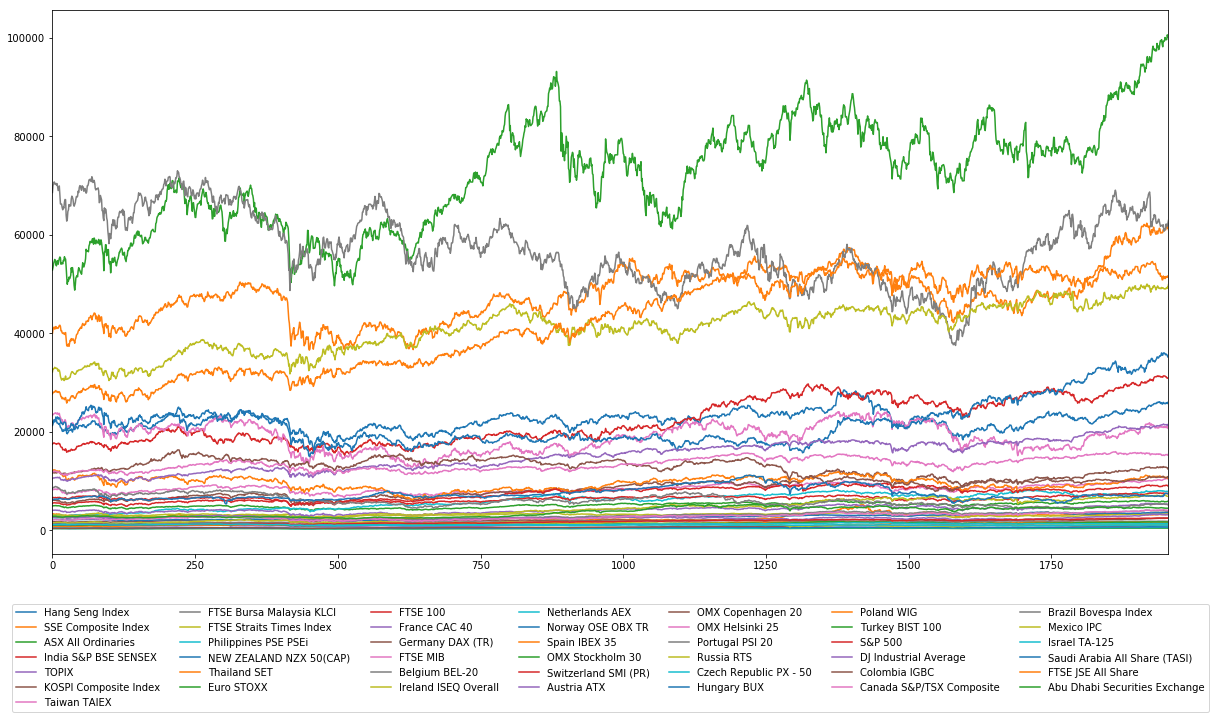

In [3]:
index_close.plot(figsize=(20,10)).legend(loc='lower center', ncol=7, bbox_to_anchor=(0.5,-0.3))

Again this confirms that the data needs to be scaled before serving as an input. In addiiton, all of the indices seem to have trends. We will need to de-trend the time-series (i.e. to make it stationary) for our models to work. A typical way is to apply a first-order differencing to the series.

Another thing to note, and also very common to financial time-series is a potential look-ahead bias. For example, for S&P 500 closes at 1600 ET, while Hang Seng closes at 0400 ET the day before. Therefore, we need to apply a proper lag to the index data, depending on where it is trading. We will assume we are a Hong Kong based investor, and operate in Hong Kong timezone.

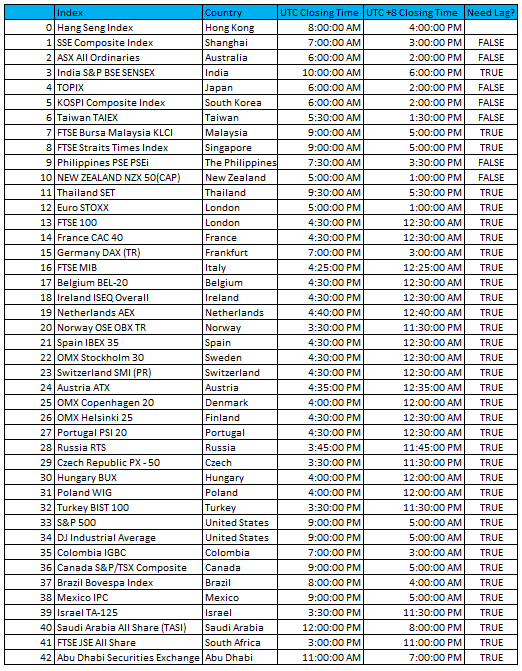

Source: https://en.wikipedia.org/wiki/List_of_stock_exchange_opening_times

In [4]:
#Seperate the indices into 2 classes - lag or no_lag
no_lag = [0, 1, 2, 4, 5, 6, 9, 10]
lag = [i for i in range(0,43) if i not in no_lag]

#Processing the dataset by applying appropriate lags
lagged_data = index_close.iloc[:,lag].shift(1)
lagged_data = pd.concat([index_close.iloc[:,no_lag], lagged_data], axis=1)

#Removing the first row
lagged_data = lagged_data.drop(lagged_data.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

lagged_data.head()

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,TOPIX,KOSPI Composite Index,Taiwan TAIEX,Philippines PSE PSEi,NEW ZEALAND NZX 50(CAP),India S&P BSE SENSEX,FTSE Bursa Malaysia KLCI,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
0,21823.28,3243.760,4889.8,915.75,1696.14,8207.85,3005.01,2140.42,17464.81,1272.78,...,1115.100,10428.05,11602.14,11746.11,68588.41,32120.47,1064.98,6121.76,27666.45,2743.61
1,22279.58,3282.179,4939.5,919.57,1690.62,8211.40,3028.46,2165.63,17558.73,1275.75,...,1132.990,10583.96,11641.37,11866.90,70045.08,32758.53,1089.34,6201.76,27895.19,2758.09
2,22416.67,3254.215,4946.8,931.13,1705.32,8327.62,3039.93,2167.87,17686.24,1288.24,...,1136.520,10572.02,11628.92,11888.08,70239.82,32732.76,1098.20,6239.10,27998.87,2774.50
3,22269.45,3192.776,4930.5,931.85,1683.45,8237.42,3077.78,2176.65,17701.13,1293.17,...,1137.140,10573.68,11626.59,11944.54,70729.34,32830.16,1098.31,6260.90,28080.36,2766.53
4,22296.75,3195.997,4942.2,941.29,1695.26,8280.90,3077.18,2193.49,17615.72,1291.42,...,1141.695,10606.86,11594.89,11887.51,70451.12,33064.57,1094.04,6260.90,28017.81,2775.50


Now since we have created a look-ahead-bias free data by suitable lags, we can then transform the data into daily returns instead of using the raw index levels.

In [5]:
#Calculate log returns.
daily_ret = np.log(lagged_data/lagged_data.shift(1))

#Remove first row
daily_ret = daily_ret.drop(daily_ret.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

daily_ret.head()


,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,TOPIX,KOSPI Composite Index,Taiwan TAIEX,Philippines PSE PSEi,NEW ZEALAND NZX 50(CAP),India S&P BSE SENSEX,FTSE Bursa Malaysia KLCI,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
0,0.020693,0.011774,0.010113,0.004163,-0.003260,0.000432,0.007773,0.011709,0.005363,0.002331,...,0.015916,0.014840,0.003376,0.010231,0.021015,0.019670,0.022616,0.012983,0.008234,0.005264
1,0.006134,-0.008556,0.001477,0.012493,0.008657,0.014054,0.003780,0.001034,0.007236,0.009743,...,0.003111,-0.001129,-0.001070,0.001783,0.002776,-0.000787,0.008100,0.006003,0.003710,0.005932
2,-0.006589,-0.019060,-0.003301,0.000773,-0.012908,-0.010891,0.012374,0.004042,0.000842,0.003820,...,0.000545,0.000157,-0.000200,0.004738,0.006945,0.002971,0.000100,0.003488,0.002906,-0.002877
3,0.001225,0.001008,0.002370,0.010079,0.006991,0.005264,-0.000195,0.007707,-0.004837,-0.001354,...,0.003998,0.003133,-0.002730,-0.004786,-0.003941,0.007115,-0.003895,0.000000,-0.002230,0.003237
4,0.005134,0.005228,0.007860,0.000000,-0.000673,0.005170,0.003300,-0.001958,-0.004291,0.001207,...,0.002873,0.001068,0.004502,0.005563,-0.002678,-0.005232,0.000000,0.000000,0.008838,0.000000


Perfect. Lets look at the descriptive statistics and distribution now for the returns data.



In [6]:
#Discriptive statistics for the returns data
daily_ret.describe()

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,TOPIX,KOSPI Composite Index,Taiwan TAIEX,Philippines PSE PSEi,NEW ZEALAND NZX 50(CAP),India S&P BSE SENSEX,FTSE Bursa Malaysia KLCI,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,...,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,0.000085,-0.000008,0.000084,0.000289,0.000176,0.000121,0.000491,0.000261,0.000291,0.000169,...,0.000396,0.000365,-0.000035,0.000132,-0.000050,0.000218,0.000098,0.000099,0.000317,0.000245
std,0.011285,0.013898,0.008747,0.012613,0.009406,0.009259,0.010364,0.005487,0.009772,0.005559,...,0.009377,0.008715,0.009514,0.007980,0.014263,0.008933,0.008770,0.011353,0.009484,0.008861
min,-0.060183,-0.088732,-0.042998,-0.099519,-0.064202,-0.057422,-0.069885,-0.033950,-0.061197,-0.027381,...,-0.068958,-0.057061,-0.050146,-0.041227,-0.092110,-0.060620,-0.082087,-0.131626,-0.036939,-0.071549
25%,-0.005457,-0.005366,-0.004649,-0.005908,-0.003990,-0.004047,-0.004840,-0.002841,-0.004692,-0.002569,...,-0.003322,-0.003150,-0.004549,-0.003941,-0.008173,-0.004333,-0.002659,-0.001574,-0.004714,-0.002278
50%,0.000000,0.000000,0.000304,0.000026,0.000000,0.000000,0.000158,0.000488,0.000000,0.000056,...,0.000261,0.000274,0.000000,0.000369,0.000000,0.000023,0.000000,0.000000,0.000143,0.000000
75%,0.005901,0.006048,0.005148,0.007105,0.004968,0.005121,0.006249,0.003657,0.005696,0.003097,...,0.004934,0.004612,0.004858,0.004451,0.008053,0.005291,0.003530,0.002997,0.006011,0.003311
max,0.055187,0.056036,0.034368,0.077153,0.049000,0.044594,0.055419,0.027371,0.037035,0.033222,...,0.046317,0.041533,0.042654,0.039410,0.063873,0.041672,0.041516,0.111428,0.042332,0.064875


The data now is scaled to have a mean close to 0. Lets examine their correlation structure of the data now. 

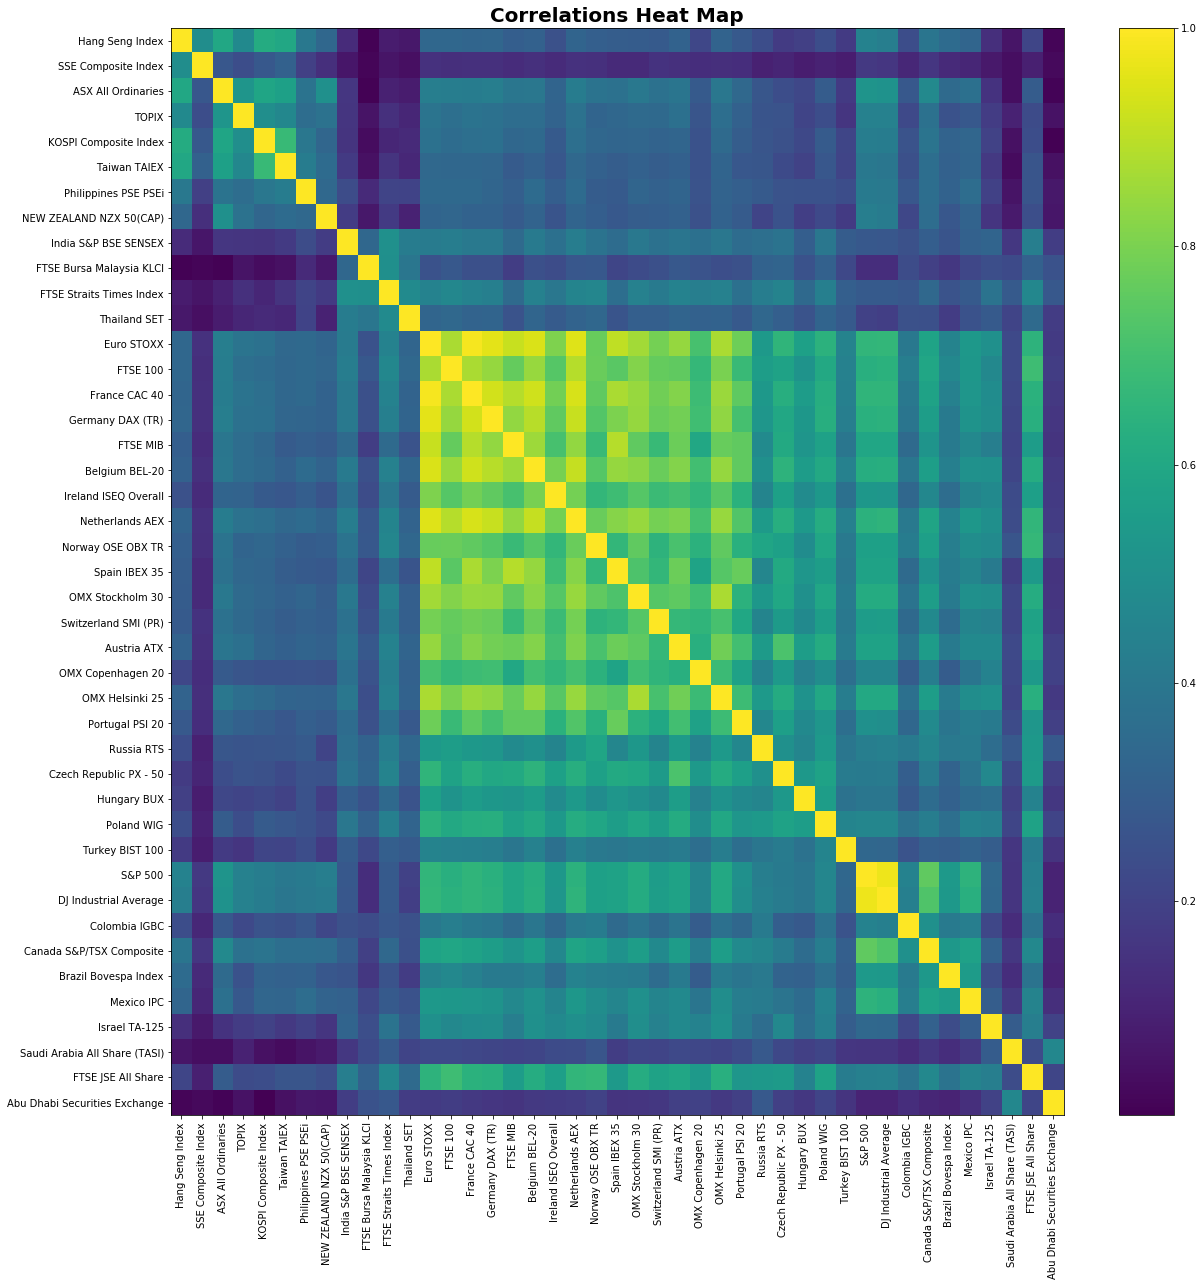

In [7]:
#Calculate correlation
corr = daily_ret.corr()

#Plot the correlation heatmap
plt.figure(figsize=(20,20))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlations Heat Map', fontsize=20, fontweight='bold')
plt.show()

From the above chart, you can see indices within the same geographic region tends to have higher correlations. The Asia-Pacific indices tends to have a higher correlations, while those indices have lower correlations with the Europe ones. 

What is more interesting to see, is the euro-zone indices have very high correlations, in particular the developed economies within the region. Perhaps this is explained by very close economic ties amongst those countries, therefore their stock markets tend to have a very high correlation.

Finally, the US indices tend to have higher average correlations to all the other indices. In particular, we can see developed market indices (e.g. Hong Kong, Japan, Singapore) have high correlation compared to developing markets (e.g. Thailand, Philippines). 

## Apply Machine Learning to the data
Now we have the preprocessed data, we can then apply machine learning techniques to learn the data and perform predictions. 

Cross-validation for time series is different from the randomized sampling. An obvious reason is the data is time series in nature, and you do not want to run predictions based on a future time point. Instead splitting the data into training, validation and test sets, we first split the data into n folds, and at the k-th split, the training set is the first k-folds, and the test set will be the (k+1)th fold


In [8]:
from sklearn.model_selection import TimeSeriesSplit

#Seperate the features and the labels
labels = daily_ret.iloc[:,0]
X = daily_ret.drop(daily_ret.columns[0], axis=1).reset_index(drop=True)

#Generate the labels from daily Hang Seng returns
y = np.empty(labels.shape)
y[labels < -0.005] = -1 #Label -1 for returns lower than -0.5%
y[labels > 0.005] = 1 #Label 1 for returns greater than 0.5%
y[(labels <= 0.005 ) & (labels >= -0.005)] = 0 #Label 0 for the rest

#Splitting into training-validation-test sets
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)


### Benchmark Model
We first generate the benchmark model. We pick the Gaussian Naive Bayes as stock return distributions are empirically close to Gaussian.

In [9]:
#Import Gaussian Naive Bayes module and performance metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score, precision_score, make_scorer
from sklearn.model_selection import cross_val_score

#Make Scorer object for cross-validation
fbeta = make_scorer(fbeta_score, beta=0.6, average='weighted')
precision = make_scorer(precision_score, average='weighted')

#Initiate
gnb_estimator = GaussianNB()

#Fit and predict on the CVs
fbeta_gnb = cross_val_score(gnb_estimator, X, y, cv=tscv, scoring=fbeta)
precision_gnb = cross_val_score(gnb_estimator, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_gnb))
print("Average Precision Score: %3.4f" % np.mean(precision_gnb))


Average F-beta Score: 0.5479
Average Precision Score: 0.5580


The benchmark model has an F-beta 0.535 and precision score 0.620, which is not a bad start.

### Fitting other models
#### 1. Logistics Regression
First model we will try is the simpliest logistics regression model. Classical finance literature often uses linear models to explain asset prices, so this will be our first step.

In [10]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define hyperparameter in logistic regression for grid-search
logit_param = {'C':np.linspace(1e-10, 1e10, 20), 'penalty':['l1','l2']}

#Fit the data using Time-Series CV
logit_estimator = GridSearchCV(LogisticRegression(), logit_param, cv=tscv, refit=True, scoring=fbeta)
logit_estimator.fit(X, y)

#Fit and predict on the CVs
fbeta_logit = cross_val_score(logit_estimator.best_estimator_, X, y, cv=tscv, scoring=fbeta)
precision_logit = cross_val_score(logit_estimator.best_estimator_, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_logit))
print("Average Precision Score: %3.4f \n" % np.mean(precision_logit))

print("Best C: %3.4f" % logit_estimator.best_params_['C'])
print("Model: %s" % logit_estimator.best_estimator_)

Average F-beta Score: 0.5997
Average Precision Score: 0.6101 

Best C: 9473684210.5263
Model: LogisticRegression(C=9473684210.5263157, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


We can see when we fit a logistic regression, this model is better than our benchmark model, with an increase in F-beta score and precision. During ther grid search, there are C values where no 'Neutral' labels are predicted.

The best logistic regression model chosen is with a L1 regulatization, with C = 9473684210.5263.

Next, lets zoom in the classification results on each fold using the best model.

In [11]:
#Import neccesary function
from sklearn.metrics import classification_report

#Running index
iteration = 1

for train_index, test_index in tscv.split(X):
    predict_logistic = logit_estimator.best_estimator_.fit(X.iloc[train_index,:], y[train_index]).predict(X.iloc[test_index, :])
    print('Split: %d' % iteration)
    print('Training Size: %d; Test Size: %d' % (len(train_index), len(test_index)))
    print(classification_report(y[test_index], predict_logistic, target_names=['Up', 'Neutral', 'Down']))
    print('\n')
    iteration += 1

Split: 1
Training Size: 329; Test Size: 325
             precision    recall  f1-score   support

         Up       0.72      0.68      0.70       108
    Neutral       0.52      0.51      0.52       119
       Down       0.63      0.68      0.66        98

avg / total       0.62      0.62      0.62       325



Split: 2
Training Size: 654; Test Size: 325
             precision    recall  f1-score   support

         Up       0.50      0.71      0.59        66
    Neutral       0.72      0.56      0.63       178
       Down       0.59      0.68      0.63        81

avg / total       0.64      0.62      0.62       325



Split: 3
Training Size: 979; Test Size: 325
             precision    recall  f1-score   support

         Up       0.48      0.41      0.44        78
    Neutral       0.57      0.63      0.60       166
       Down       0.47      0.43      0.45        81

avg / total       0.52      0.53      0.52       325



Split: 4
Training Size: 1304; Test Size: 325
             

As we feed in more training data, the model has better 'Up' label precision. Not bad in this very simple case, but lets see if we can do better.

#### 2. AdaBoost
Next we will try an ensemble methods to see if that improves our predictability.

In [12]:
#Import Ensemble methods
from sklearn.ensemble import AdaBoostClassifier

#Set Parameters for AdaBoost Grid Search
adaboost_param = {'n_estimators':[1,10,100,300,500], 'learning_rate':[0.001,0.01,0.1,1,10]}

#Set Grid Search and fit
adaboost_estimator = GridSearchCV(AdaBoostClassifier(random_state=10), adaboost_param, cv=tscv, refit=True, scoring=fbeta)
adaboost_estimator.fit(X, y)

#Calculate F-beta and precision score
fbeta_adaboost = cross_val_score(adaboost_estimator.best_estimator_, X, y, cv=tscv, scoring=fbeta)
precision_adaboost = cross_val_score(adaboost_estimator.best_estimator_, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_adaboost))
print("Average Precision Score: %3.4f" % np.mean(precision_adaboost))

print("Best number of estimators: %d" % adaboost_estimator.best_params_['n_estimators'])
print("Best learning rate: %3.4f" % adaboost_estimator.best_params_['learning_rate'])
print("Model: %s" % adaboost_estimator.best_estimator_)

Average F-beta Score: 0.6232
Average Precision Score: 0.6547
Best number of estimators: 300
Best learning rate: 0.1000
Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=300, random_state=10)


In [13]:
#Running index
iteration = 1

for train_index, test_index in tscv.split(X):
    predict_logistic = adaboost_estimator.best_estimator_.fit(X.iloc[train_index,:], y[train_index]).predict(X.iloc[test_index, :])
    print('Split: %d' % iteration)
    print('Training Size: %d; Test Size: %d' % (len(train_index), len(test_index)))
    print(classification_report(y[test_index], predict_logistic, target_names=['Up', 'Neutral', 'Down']))
    print('\n')
    iteration += 1

Split: 1
Training Size: 329; Test Size: 325
             precision    recall  f1-score   support

         Up       0.68      0.59      0.63       108
    Neutral       0.49      0.65      0.56       119
       Down       0.77      0.59      0.67        98

avg / total       0.64      0.61      0.62       325



Split: 2
Training Size: 654; Test Size: 325
             precision    recall  f1-score   support

         Up       0.59      0.56      0.57        66
    Neutral       0.66      0.69      0.67       178
       Down       0.59      0.57      0.58        81

avg / total       0.63      0.63      0.63       325



Split: 3
Training Size: 979; Test Size: 325
             precision    recall  f1-score   support

         Up       0.77      0.31      0.44        78
    Neutral       0.59      0.86      0.70       166
       Down       0.64      0.40      0.49        81

avg / total       0.64      0.61      0.58       325



Split: 4
Training Size: 1304; Test Size: 325
             

We can see by using Adaboost, there is an overall improvement in the fitting. Precision has been improved, and at the same time the overall F-beta score has improved from 0.5997 to 0.6232. Therefore, Adaboost seems to be a better choice over logistic regression.

We can generate chart plotting the feature importance on the optimized model.

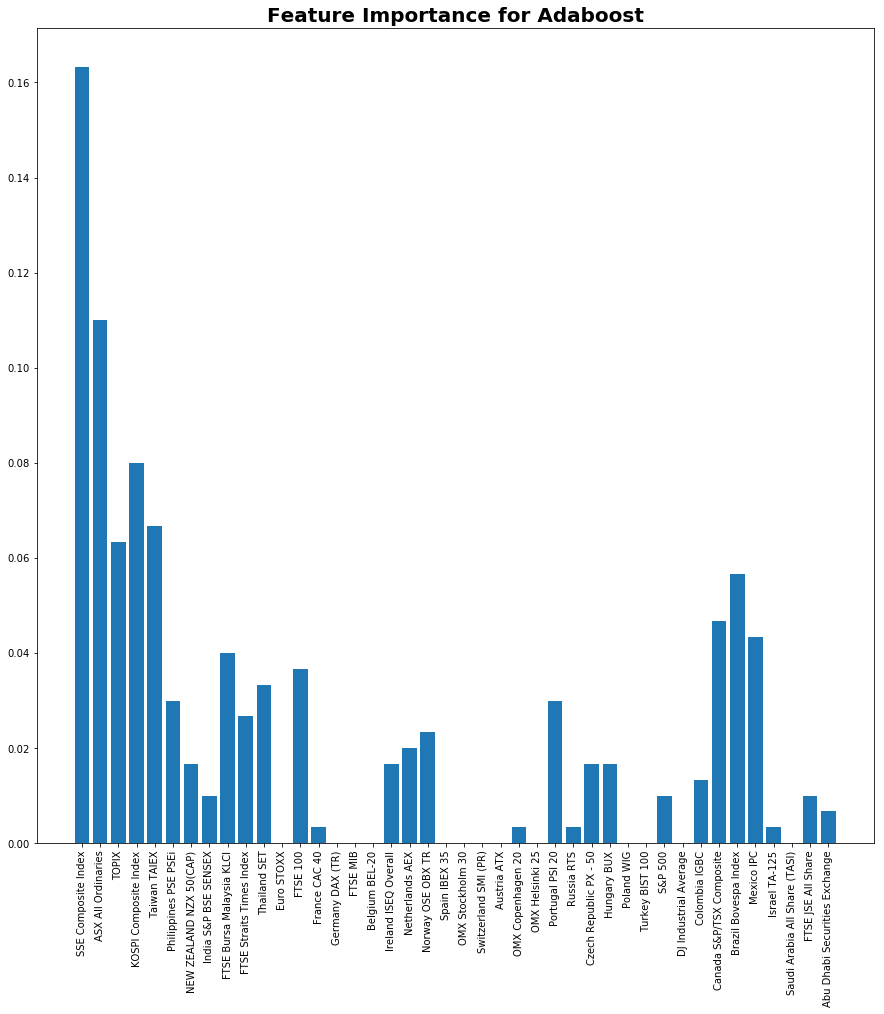

In [14]:
importance = adaboost_estimator.best_estimator_.feature_importances_ #Get importance coefficients

ind = np.arange(len(importance))

#Plot chart
fig = plt.figure(figsize=(15,15))
plt.bar(ind, importance)
plt.xticks(ind, X.columns, rotation='vertical')
plt.title('Feature Importance for Adaboost', fontsize=20, fontweight='bold')
plt.show()

Without surprise, we see that indices within Asia-Pacific region has more importance in predicting Hang Seng index's movement. Again they sit in the same timezone, and their economies are more closely ties to each other so it is expected. Also companies that are constituents within Hang Seng are likely to have business within the region as well, this will also contribute to the significance of the feature.

Within Europe, UK has the highest significance, and some contributions are coming from smaller economies like Czech, Portugal and Hungary.

Interestingly, US indices seem to have minor predictive power in Hang Seng movements. S&P 500 only has around 0.01 importance, and DJ Average has none. While Canada, Brazil and Mexico has high importance is something quite interesting to see as well.




#### 3. Feedforward Neural Network
Next we will turn to deep learning techniques to see if this will further improve our prediction. First we will look at a simple Feedforward Neural Network. 

One of the things to determin is the number of hidden layers and at each hidden layer, how many percetrons. We are inputting 42 features, and lets try a number of layers matching the number of regions we have, which is 4 (Asia Pac, Europe, US, Middle East) and at each layer having a decay number of perceptrons from 42, to 1.

We will using Keras library with a tensorflow backend as the main Neural Network library. 

In [40]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.np_utils import to_categorical

#Splitting the data into 80% training and 20% test, but has to preserve the ordering
train_size = 0.8
cut_index = int(np.floor(0.8 * X.shape[0]))
X_train = X.iloc[0:(cut_index-1),:]
X_test = X.iloc[cut_index:X.shape[0],:]
y_train = y[0:(cut_index-1)]
y_test = y[cut_index:len(y)]

#Checking
#if X_train.shape[0] == len(y_train):
    #print("Yes")
#if X_test.shape[0] == len(y_test):
    #print("Yes")

#Parameters
drop_out = 0.6
input_dim = X.shape[1]
learn_rate = 0.01
decay = 1e-6
num_epoch = 10

#Trans

#Setting up the instance
model = Sequential()

#Set Neural Network Structure
#------------------------------------------
#First layer
model.add(Dense(42, activation='relu', input_dim=input_dim))
model.add(Dropout(drop_out))

#Second layer
model.add(Dense(21, activation='relu'))
model.add(Dropout(drop_out))

#Third Layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(drop_out))

#Output Layer
model.add(Dense(1, activation='softmax'))
#------------------------------------------

#Define Optimizer, using Stochastic Gradient Decent
sgd = optimizers.SGD(lr=learn_rate, decay=decay)

#Compile Model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

#Fitting the model
model.fit(X, y, epochs = num_epoch, verbose=1, validation_split=0.2, shuffle=False)

#Evaluation
score = model.evalute(X_test, y_test)

Train on 1563 samples, validate on 391 samples
Epoch 1/10


KeyError: '[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24\n 25 26 27 28 29 30 31] not in index'